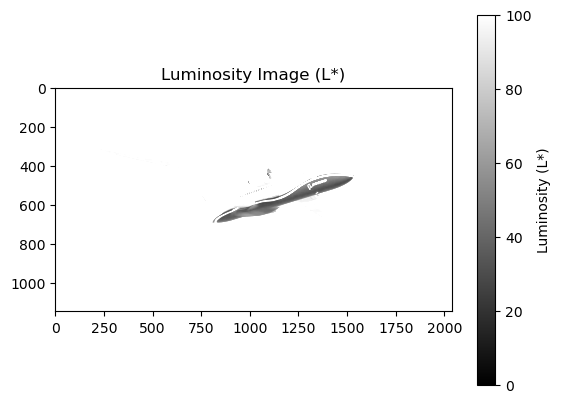

In [6]:
import cv2
import matplotlib.pyplot as plt

def extract_luminosity(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert BGR to RGB
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Convert RGB to Lab
    lab_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2LAB)

    # Extract the L* channel
    l_channel = lab_image[:, :, 0]

    return l_channel

# Example usage
image_path = '06172023_transonic-illo_200022.jpg.webp'
luminosity_feature = extract_luminosity(image_path)

# Display the L* channel as a grayscale image
plt.imshow(luminosity_feature, cmap='gray', vmin=0, vmax=100)
plt.title('Luminosity Image (L*)')
plt.colorbar(label='Luminosity (L*)')
plt.show()


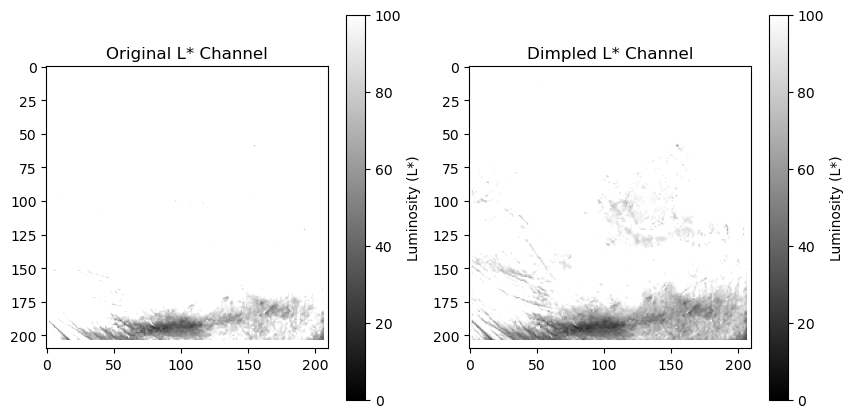

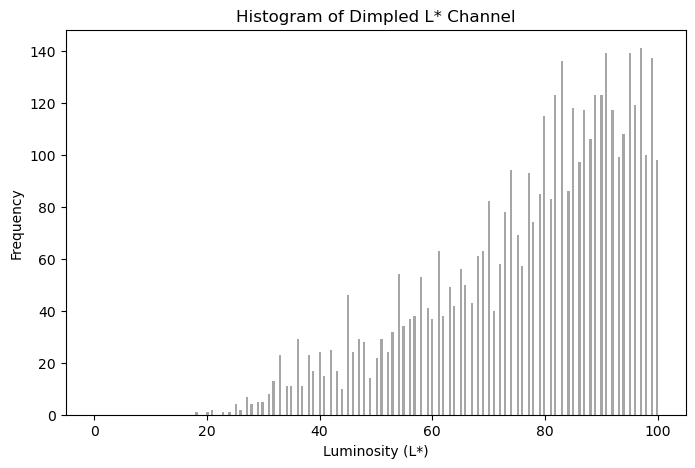

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def extract_luminosity(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert BGR to RGB
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Convert RGB to Lab
    lab_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2LAB)

    # Extract the L* channel
    l_channel = lab_image[:, :, 0]

    return l_channel

def dimple_image(l_channel, dimple_factor=0.8):
    # Apply the dimple effect by reducing the L* values
    dimpled_l_channel = l_channel * dimple_factor

    # Ensure the values stay within the valid range (0 to 100)
    dimpled_l_channel = np.clip(dimpled_l_channel, 0, 100)

    return dimpled_l_channel

# Example usage
image_path = 'skin-ulcer.png'
luminosity_feature = extract_luminosity(image_path)

# Dimple the L* channel
dimpled_l_channel = dimple_image(luminosity_feature)

# Display the dimpled L* channel
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(luminosity_feature, cmap='gray', vmin=0, vmax=100)
plt.title('Original L* Channel')
plt.colorbar(label='Luminosity (L*)')

plt.subplot(1, 2, 2)
plt.imshow(dimpled_l_channel, cmap='gray', vmin=0, vmax=100)
plt.title('Dimpled L* Channel')
plt.colorbar(label='Luminosity (L*)')

plt.show()

# Display the histogram of the dimpled L* channel
plt.figure(figsize=(8, 5))
plt.hist(luminosity_feature.flatten(), bins=256, range=[0, 100], color='gray', alpha=0.7)
plt.title('Histogram of Dimpled L* Channel')
plt.xlabel('Luminosity (L*)')
plt.ylabel('Frequency')
plt.show()
